In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
X, y = load_diabetes(return_X_y=True)

# Use only one feature
X = X[:, np.newaxis, 2]

X_train = X[:-45]
X_test = X[-45:]

y_train = y[:-45]
y_test = y[-45:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [3]:
%time
lr = LinearRegression()
lr.fit(X_train, y_train)

Wall time: 0 ns


LinearRegression()

In [4]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Coefficients:\n', lr.coef_)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

Coefficients:
 [953.02484976]
MSE: 3203.71
R2: 0.42


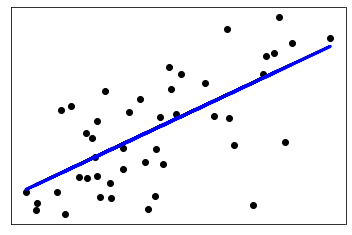

In [5]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
X, y = load_diabetes(return_X_y=True)

X_train = X[:-45]
X_test = X[-45:]

y_train = y[:-45]
y_test = y[-45:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [8]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)

Wall time: 2 ms


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Coefficients:\n', lr.coef_)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [11]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)

Wall time: 3.99 ms


LinearRegression()

In [12]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Coefficients:\n', lr.coef_)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

Coefficients:
 [  19.92576904 -262.55453086  509.19112446  336.09693678 -849.29530342
  480.22076125  120.68418641  236.71853501  716.61035542   70.41045019]
MSE: 2743.88
R2: 0.55


In [13]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [14]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)

Wall time: 2 ms


LinearRegression()

In [15]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Coefficients:\n', lr.coef_)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

Coefficients:
 [-4.35714430e-01 -2.37525679e+02  5.20204259e+02  3.04180610e+02
 -7.51600920e+02  4.29820391e+02  9.94829896e+01  2.14876948e+02
  6.89388576e+02  9.73230260e+01]
MSE: 1735.94
R2: 0.69


In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
%%time
X, y = load_diabetes(return_X_y=True)
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=5)
scores.mean(), scores.std()

Wall time: 27 ms


(0.48231812211149394, 0.04926619776563209)

In [18]:
%%time
X, y = load_diabetes(return_X_y=True)
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=5, scoring='r2_score')
scores.mean(), scores.std()

ValueError: 'r2_score' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
%%time
X, y = load_diabetes(return_X_y=True)
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
scores.mean(), scores.std()

In [ ]:
np.random.seed(42)

n_samples, n_features = 10**4, 500
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)

y = np.dot(X, true_coef)

In [ ]:
%%time
lr = LinearRegression()
lr.fit(X,y)
print (f'R2: {lr.score(X,y):.4f}')

In [ ]:
%%time
ridge = Ridge(alpha=0.0, solver='sparse_cg')
ridge.fit(X,y)
print (f'R2: {ridge.score(X,y):.4f}')

In [ ]:
np.random.seed(42)

n_samples, n_features = 10**4, 500
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)

y = np.dot(X, true_coef)

# Add some noise
y += 25 * np.random.normal(size=(n_samples,))

In [ ]:
%%time
lr = LinearRegression()
lr.fit(X,y)
print (f'R2: {lr.score(X,y):.4f}')

In [ ]:
%%time
ridge = Ridge(alpha=0.0, solver='sparse_cg')
ridge.fit(X,y)
print (f'R2: {ridge.score(X,y):.4f}')

https://scikit-learn.org/stable/user_guide.html

https://scikit-learn.org/stable/modules/classes.html

https://scikit-learn.org/stable/auto_examples/index.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/sgd.html

https://scikit-learn.org/stable/modules/cross_validation.html